## <img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Práctico 2
#### Nombre y Apellido Lourdes Lujan Gallo

***
## Ventanas


<div class="alert alert-block alert-info">
<b>1)</b> Implemente las funciones para generar las siguientes ventanas $w(k)$:

</div>

+ Bartlett ó triangular
+ Hann
+ Blackman
+ Flat-top



<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede consultar el capítulo 6.3 del libro de B. Porat para obtener las expresiones analíticas de cada ventana.

</div>

   a) Para cada ventana grafique $w(k)$ y el módulo de su espectro $ \lvert W(\Omega) \rvert $


<div class="alert alert-block alert-warning">
<img src="./ojo.svg" align="left" width="50" />  Normalice la amplitud máxima de todas las ventanas a 0 dB.
</div>

In [39]:
## Inicialización del Notebook del TP2

import numpy as np
import scipy
from scipy import signal
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import DataFrame
from IPython.display import HTML

N  = 1000 # muestras
fs = 1000 # Hz

# Insertar aquí el código para inicializar tu notebook
########################################################

mpl.rcParams['figure.figsize'] = [14,10]
fig_sz_x = 10
fig_sz_y = 10
fig_dpi = 80 # dpi

fig_font_family = 'DejaVu Sans'
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
plt.rcParams.update({'font.family':fig_font_family})


<ipython-input-40-9645e58e965f>:24: RuntimeWarning: divide by zero encountered in log10
  fftwRect = 20*np.log10(np.abs(scipy.fft.fft(wRectPad))*2/N)
<ipython-input-40-9645e58e965f>:27: RuntimeWarning: divide by zero encountered in log10
  fftwBart = 20*np.log10(np.abs(scipy.fft.fft(wBartPad))*2/N)
<ipython-input-40-9645e58e965f>:30: RuntimeWarning: divide by zero encountered in log10
  fftwHann = 20*np.log10(np.abs(scipy.fft.fft(wHannPad))*2/N)
<ipython-input-40-9645e58e965f>:33: RuntimeWarning: divide by zero encountered in log10
  fftwBlack = 20*np.log10(np.abs(scipy.fft.fft(wBlackPad))*2/N)
<ipython-input-40-9645e58e965f>:36: RuntimeWarning: divide by zero encountered in log10
  fftwFlat = 20*np.log10(np.abs(scipy.fft.fft(wFlatPad))*2/N)


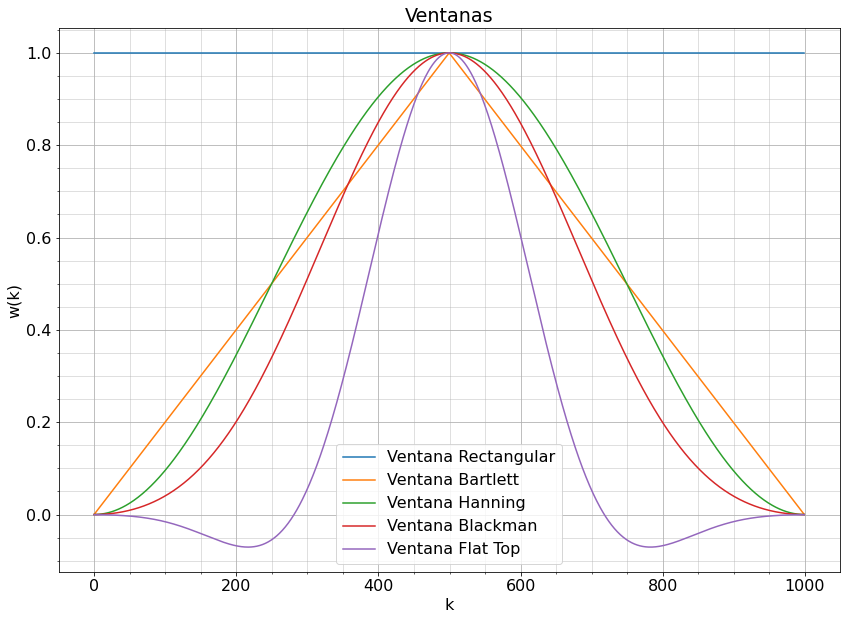

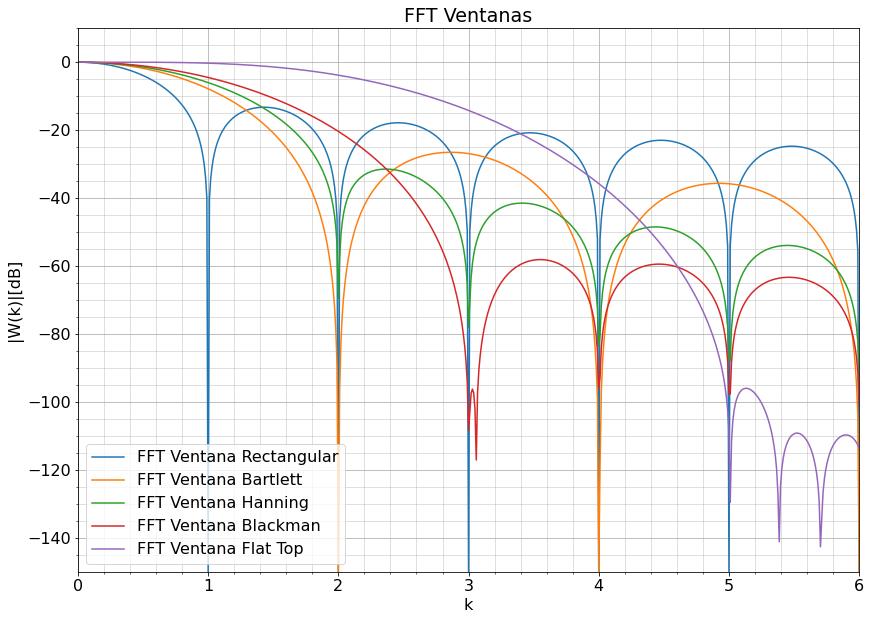

In [40]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################

df = fs/N # resolución espectral
M=100 #Cantidad de ceros multiplos de N para cero padding W(k)

wRect = signal.boxcar(N) #Ventana Rectangular
wRectPad =  np.pad(wRect, (0,int(M*N)),'constant')
wBart = signal.bartlett(N)
wBartPad =  np.pad(wBart, (0,int(M*N)),'constant')
wHann = signal.hann(N)
wHannPad =  np.pad(wHann, (0,int(M*N)),'constant')
wBlack = signal.blackman(N)
wBlackPad =  np.pad(wBlack, (0,int(M*N)),'constant')
wFlat = signal.flattop(N)
wFlatPad =  np.pad(wFlat, (0,int(M*N)),'constant')

ff = np.arange(0,N,df) 
ffpad = np.arange(0,N,df*N/(N*(M+1))) 
bfrec = ff <= fs/2
bfrecPad = ffpad <= fs/2

fftwRect = 20*np.log10(np.abs(scipy.fft.fft(wRectPad))*2/N)
fftwRectNorm = fftwRect - fftwRect[0]
fftwRectNorm = np.clip(fftwRectNorm, -150,0)
fftwBart = 20*np.log10(np.abs(scipy.fft.fft(wBartPad))*2/N)
fftwBartNorm = fftwBart - fftwBart[0]
fftwBartNorm = np.clip(fftwBartNorm, -150,0)
fftwHann = 20*np.log10(np.abs(scipy.fft.fft(wHannPad))*2/N)
fftwHannNorm = fftwHann - fftwHann[0]
fftwHannNorm = np.clip(fftwHannNorm, -150,0)
fftwBlack = 20*np.log10(np.abs(scipy.fft.fft(wBlackPad))*2/N)
fftwBlackNorm = fftwBlack - fftwBlack[0]
fftwBlackNorm = np.clip(fftwBlackNorm, -150,0)
fftwFlat = 20*np.log10(np.abs(scipy.fft.fft(wFlatPad))*2/N)
fftwFlatNorm = fftwFlat - fftwFlat[0]
fftwFlatNorm = np.clip(fftwFlatNorm, -150,0)


plt.figure(1)
plt.minorticks_on()
plt.grid(True,'minor',alpha=0.5)
plt.grid(True)
plt.plot(wRect, label='Ventana Rectangular')
plt.plot(wBart, label='Ventana Bartlett')  # etc.
plt.plot(wHann, label='Ventana Hanning') 
plt.plot(wBlack, label='Ventana Blackman') 
plt.plot(wFlat, label='Ventana Flat Top') 
plt.xlabel('k')
plt.ylabel('w(k)')
plt.title("Ventanas")
plt.legend()

plt.figure(2)
plt.xlim(0,6)
plt.ylim(-150,10)
plt.minorticks_on()
plt.grid(True,'minor',alpha=0.5)
plt.grid(True)
plt.plot(ffpad[bfrecPad],fftwRectNorm[bfrecPad], label='FFT Ventana Rectangular') 
plt.plot(ffpad[bfrecPad],fftwBartNorm[bfrecPad], label='FFT Ventana Bartlett')  
plt.plot(ffpad[bfrecPad],fftwHannNorm[bfrecPad], label='FFT Ventana Hanning')
plt.plot(ffpad[bfrecPad],fftwBlackNorm[bfrecPad], label='FFT Ventana Blackman')
plt.plot(ffpad[bfrecPad],fftwFlatNorm[bfrecPad], label='FFT Ventana Flat Top')
plt.xlabel('k')
plt.ylabel('|W(k)|[dB]')
plt.title("FFT Ventanas")
plt.legend()



b) Construya una tabla en la que figure la anchura normalizada del lóbulo principal  de la ventana, $\Omega_1$, siendo 

$$ \lvert W(\Omega_1) \rvert = \frac{\sqrt{2}}{2}$$ 

y el valor de transferencia máxima de los lóbulos secundarios expresado en dB 

$$ W_2 = \mathop{max} \{\lvert W(\Omega) \rvert\} ,\space\space \forall \space \Omega \geq \Omega_0 $$

siendo $\Omega_0$ la frecuencia del primer cruce por cero $\lvert W(\Omega) \rvert\ = 0$ ó la frecuencia límite superior del lóbulo principal. Utilice como norma de frecuencia la frecuencia de Nyquist, de manera que las mediciones de frecuencias sean adimensionales y comparables independientemente de la frecuencia de muestreo.

In [41]:

#######################################
# Tu simulación que genere resultados #
#######################################

Acorte = 20 * np.log10(np.sqrt(2)/2)

kCorteWRect = np.array(np.where(fftwRectNorm <= Acorte )).flatten()
fCorteWRectNorm = ff[kCorteWRect[0]]*2/fs

kCorteWBart = np.array(np.where(fftwBartNorm <= Acorte )).flatten()
fCorteWBartNorm = ff[kCorteWBart[0]]*2/fs

kCorteWHann = np.array(np.where(fftwHannNorm <= Acorte )).flatten()
fCorteWHannNorm = ff[kCorteWHann[0]]*2/fs

kCorteWBlack = np.array(np.where(fftwBlackNorm <= Acorte )).flatten()
fCorteWBlackNorm = ff[kCorteWBlack[0]]*2/fs

kCorteWFlat = np.array(np.where(fftwFlatNorm <= Acorte )).flatten()
fCorteWFlatNorm = ff[kCorteWFlat[0]]*2/fs

DerivadafftwRectNorm = np.gradient(fftwRectNorm)
DerivadafftwRectNorm = np.clip(np.gradient(DerivadafftwRectNorm),0,100)
DerivadafftwBartNorm = np.gradient(fftwBartNorm)
DerivadafftwBartNorm = np.clip(np.gradient(DerivadafftwBartNorm),0,100)
DerivadafftwHannNorm = np.gradient(fftwHannNorm)
DerivadafftwHannNorm = np.clip(np.gradient(DerivadafftwHannNorm),0,100)
DerivadafftwBlackNorm = np.gradient(fftwBlackNorm)
DerivadafftwBlackNorm = np.clip(np.gradient(DerivadafftwBlackNorm),0,100)
DerivadafftwFlatNorm = np.gradient(fftwFlatNorm)
DerivadafftwFlatNorm = np.clip(np.gradient(DerivadafftwFlatNorm),0,100)


cerosfftwRectNorm = signal.find_peaks(DerivadafftwRectNorm,width=1)[0]
cerosfftwBartNorm = signal.find_peaks(DerivadafftwBartNorm,width=1)[0]
cerosfftwHannNorm = signal.find_peaks(DerivadafftwHannNorm,width=1)[0]
cerosfftwBlackNorm = signal.find_peaks(DerivadafftwBlackNorm,width=1)[0]
cerosfftwFlatNorm = signal.find_peaks(DerivadafftwFlatNorm,width=1)[0]


IndicesPrimerLobuloRect = np.arange(0,cerosfftwRectNorm[0],1) 
W2Rect = np.max(np.delete(fftwRectNorm[bfrecPad],IndicesPrimerLobuloRect))
IndicesPrimerLobuloBart = np.arange(0,cerosfftwBartNorm[0],1) 
W2Bart = np.max(np.delete(fftwBartNorm[bfrecPad],IndicesPrimerLobuloBart))
IndicesPrimerLobuloHann = np.arange(0,cerosfftwHannNorm[0],1) 
W2Hann = np.max(np.delete(fftwHannNorm[bfrecPad],IndicesPrimerLobuloHann))
IndicesPrimerLobuloBlack = np.arange(0,cerosfftwBlackNorm[0],1) 
W2Black = np.max(np.delete(fftwBlackNorm[bfrecPad],IndicesPrimerLobuloBlack))
IndicesPrimerLobuloFlat = np.arange(0,cerosfftwFlatNorm[0],1) 
W2Flat = np.max(np.delete(fftwFlatNorm[bfrecPad],IndicesPrimerLobuloFlat))

tus_resultados = [ 
                   [fCorteWRectNorm, W2Rect], # <-- acá debería haber numeritos :)
                   [fCorteWBartNorm, W2Bart], # <-- acá debería haber numeritos :)
                   [fCorteWHannNorm, W2Hann], # <-- acá debería haber numeritos :)
                   [fCorteWBlackNorm, W2Black], # <-- acá debería haber numeritos :)
                   [fCorteWFlatNorm, W2Flat] # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$f_1$ (#)', '$W_2$ (dB)'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$f_1$ (#),$W_2$ (dB)
Rectangular,0.090,-13.262321
Bartlett,0.130,-26.522951
Hann,0.146,-31.467509
Blackman,0.168,-58.109883
Flat-top,0.378,-93.008393


<div class="alert alert-block alert-info">
<b>2)</b> Genere una señal bitonal de las siguientes características
</div>


  $  x(k) = x_1(k) + x_2(k) $

  $  x_1(k) = sen(\Omega_1·k)$

  $  x_2(k) = a_2 · sen(\Omega_2·k)   $

siendo 

  $\Omega_1 = \frac{\pi}{2}$

  $\Omega_2 = \Omega_1 + 10·\frac{2\pi}{N}$

  $a_2 = -40$ dB


Responda a las siguientes consignas:

<div class="alert alert-block alert-info">
<b>2.a)</b>  Calcule el espectro $ \lvert X(\Omega) \rvert $

</div>

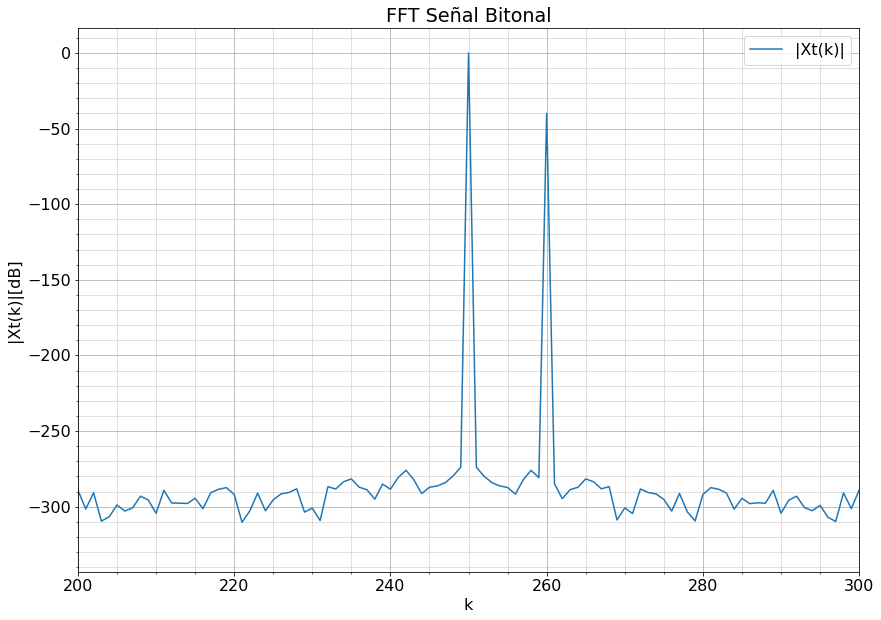

In [42]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################

a0 = 1
p0 = 0
desintonia = 0 #Desintonia
df = fs/N # resolución espectral
f0 = (N/4*df) # corresponde con la mited de banda digital (pi/2)


def generador_senoidal (fs, f0, N, a0, p0):
    """ 
    
    brief:  Generador de señales senoidal, con argumentos
    
    fs:     frecuencia de muestreo de la señal [Hz]
    N:      cantidad de muestras de la señal a generar
    f0:     frecuencia de la senoidal [Hz]
    a0:     amplitud pico de la señal [V]
    p0:     fase de la señal sinusoidal [rad]
    
    como resultado la señal devuelve:
    
    signal: senoidal evaluada en cada instante 
    tt:     base de tiempo de la señal
    """  
    ts = 1/fs # tiempo de muestreo
    tt = np.linspace(0, (N-1)*ts, N).flatten()
        
    # comienzo de la función
    
    signal = a0 * np.sin (2*np.pi*f0*tt+p0)
    
    
    # fin de la función
    
       
    return tt, signal

tt, x1 = generador_senoidal(fs, f0, N, a0, p0=0)

ff = np.arange(0,N,df)
bfrec = ff <= fs/2

Att = 40
a2 = 1/np.power(10,Att/20) # para lograr una senoidal de amplitud 40db abajo
f2=f0+10

tt, x2 = generador_senoidal(fs, f2, N, a2, p0=0)

xt=x1+x2

Xtmod = np.abs(scipy.fft.fft(xt))*2/N
XtmodDB = 20*np.log10(Xtmod)

plt.figure(1)
plt.xlim(200,300)
plt.minorticks_on()
plt.grid(True,'minor',alpha=0.5)
plt.grid(True)
plt.plot(ff[bfrec], XtmodDB[bfrec],label='|Xt(k)|')
plt.xlabel('k')
plt.ylabel('|Xt(k)|[dB]')
plt.title("FFT Señal Bitonal")
plt.legend()


<div class="alert alert-block alert-info">
<b>2.b)</b> Repita a) disminuyendo la amplitud de $x_2$.
</div>

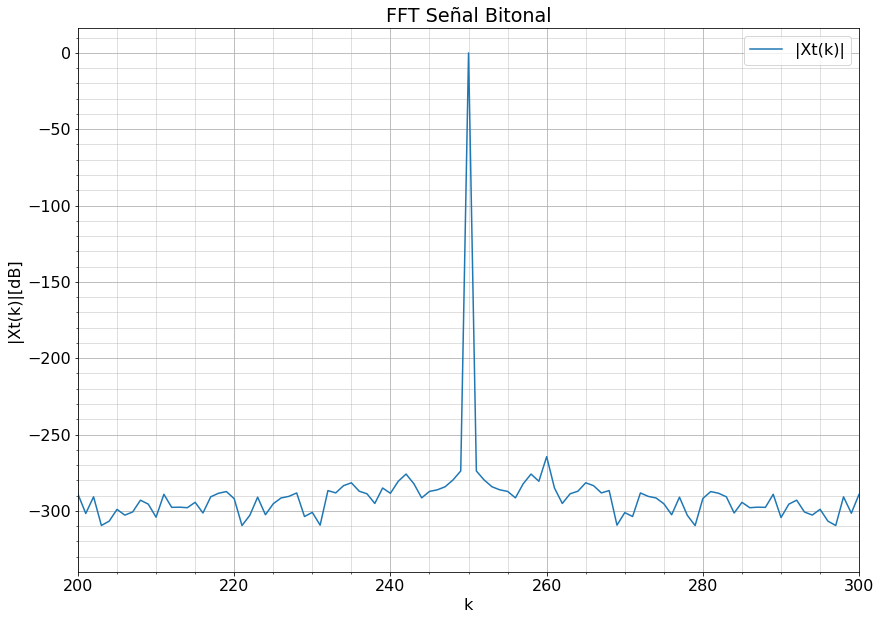

In [43]:
Att = 265
a2 = 1/np.power(10,Att/20) # para lograr una senoidal de amplitud Attdb menor
f2=f0+10

tt, x2 = generador_senoidal(fs, f2, N, a2, p0=0)

xt=x1+x2

Xtmod = np.abs(scipy.fft.fft(xt))*2/N
XtmodDB = 20*np.log10(Xtmod)

plt.figure(1)
plt.xlim(200,300)
plt.minorticks_on()
plt.grid(True,'minor',alpha=0.5)
plt.grid(True)
plt.plot(ff[bfrec], XtmodDB[bfrec],label='|Xt(k)|')
plt.xlabel('k')
plt.ylabel('|Xt(k)|[dB]')
plt.title("FFT Señal Bitonal")
plt.legend()

¿Cuál es el factor de escala mínimo de $x_2$, definido como $a^0_2$, que permite evidenciar su existencia en el espectro de $\lvert X(\Omega) \rvert$ ?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> El factor de escala $a^0_2$ que pemite evidenciar la existencia de X2 en el espectro es aproximadamente 265dB  por debajo de $a0$ (amplitud de x1(t)).

¿De qué depende poder medir $x_2$?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Depende del piso de ruido, en este caso impuesto por el sistema numérico que en éste caso está alrededor de los -270 db.
</div>

Considere ahora que esta señal proviene de un ADC de 16 bits. Incorpore al análisis el correspondiente ruido de cuantización. ¿Cómo afecta esta situación la medición de $x_2$?

<ipython-input-44-67d4f946d394>:35: RuntimeWarning: divide by zero encountered in log10
  fftModsq3dB = 10*np.log10(fftMod2sq3)


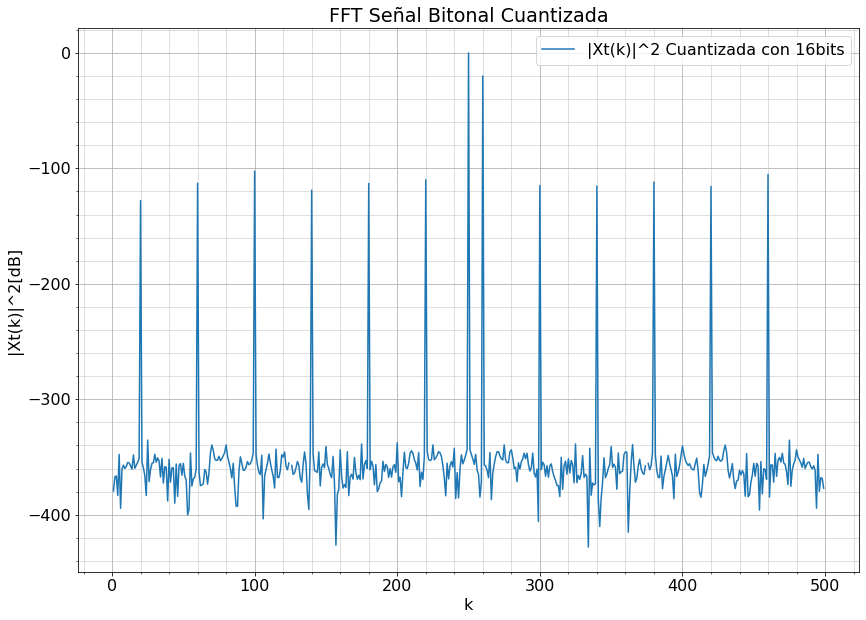

In [44]:
df = fs/N # resolución espectral
Vref = 1
B=8
B1=4
B2=8
B3=16

Att = 20
a2 = 1/np.power(10,Att/20) # para lograr una senoidal de amplitud Attdb menor
f2=f0+10


tt, x2 = generador_senoidal(fs, f2, N, a2, p0=0)

xt=x1+x2

muestras = []

def my_ADC (senial, B, Vref):
    
    q = Vref/(2**(B-1)-1)
    valor = senial/q 
    muestras=np.rint(valor)    
       
    return muestras

sq3=my_ADC(xt,B3,Vref)
q3 = Vref/(2**(B3-1)-1)
ff = np.arange(0,N,df)
bfrec = ff <= fs/2

fftsq3 =scipy.fft.fft(sq3)
fftModsq3 = np.abs(fftsq3)/(N/(2*q3))
fftMod2sq3 = fftModsq3**2
fftModsq3dB = 10*np.log10(fftMod2sq3)

plt.figure(1)
#plt.xlim(200,300)
plt.minorticks_on()
plt.grid(True,'minor',alpha=0.5)
plt.grid(True)
plt.plot(ff[bfrec], fftModsq3dB[bfrec],label='|Xt(k)|^2 Cuantizada con 16bits')
plt.xlabel('k')
plt.ylabel('|Xt(k)|^2[dB]')
plt.title("FFT Señal Bitonal Cuantizada")
plt.legend()


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Observese en el espectro de potencias mas arriba, que el hecho de cuantizar la señal produce componentes indeseadas que podrían considerarse como un nuevo piso de ruido. Es decir que no sería posible distinguir señales con un nivel menor a dicho piso que en esta experimentación se encuentra alrededor de los -100dB. Este valor coincide con el valor teórico de ruido de cuantización expresado como q^2/12. Siendo q = Vref/2^B. Si Vref = 1 y B = 16 entonces la potencia de ruido de cuantización es de -101 dB.
</div>

In [45]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################


<div class="alert alert-block alert-info">
<b>2.c)</b> Repita a) incrementando la frecuencia de $x_1$ para $\Omega_1 = \frac{\pi}{2} + d_1·\frac{2\pi}{N}$ para valores de $d_1 = (0,01; 0.25; 0.5)$. Aumente la amplitud de $a_2$ hasta que se evidencie sobre el leakage y construya una tabla con dicho valor para las 3 situaciones correspondientes a desintonías leve, moderada y máxima.
</div>

In [46]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################

AttdLeve = 53
AttdModerada = 28
AttdMaxima = 30

a2dLeve = 1/np.power(10,AttdLeve/20) # para lograr una senoidal de amplitud Attdb menor
a2dModerada = 1/np.power(10,AttdModerada/20) # para lograr una senoidal de amplitud Attdb menor
a2dMaxima = 1/np.power(10,AttdMaxima/20) # para lograr una senoidal de amplitud Attdb menor

f2=f0+10

desintoniaLeve = 0.01
desintoniaModerada = 0.25
desintoniaMaxima = 0.5

tt, x1dLeve = generador_senoidal(fs, f0 + desintoniaLeve, N, a0, p0=0)
tt, x1dModerada = generador_senoidal(fs, f0 + desintoniaModerada, N, a0, p0=0)
tt, x1dMaxima = generador_senoidal(fs, f0 + desintoniaMaxima, N, a0, p0=0)

tt, x2dLeve = generador_senoidal(fs, f2, N, a2dLeve, p0=0)
tt, x2dModerada = generador_senoidal(fs, f2, N, a2dModerada, p0=0)
tt, x2dMaxima = generador_senoidal(fs, f2, N, a2dMaxima, p0=0)

xtdLeve=x1dLeve+x2dLeve
xtdModerada=x1dModerada+x2dModerada
xtdMaxima=x1dMaxima+x2dMaxima

XtmoddLeve = np.abs(scipy.fft.fft(xtdLeve))*2/N
XtmodDBdLeve = 20*np.log10(XtmoddLeve)

XtmoddModerada = np.abs(scipy.fft.fft(xtdModerada))*2/N
XtmodDBdModerada = 20*np.log10(XtmoddModerada)

XtmoddMaxima = np.abs(scipy.fft.fft(xtdMaxima))*2/N
XtmodDBdMaxima = 20*np.log10(XtmoddMaxima)


#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   -AttdLeve, # <-- acá debería haber numeritos :)
                   -AttdModerada, # <-- acá debería haber numeritos :)
                   -AttdMaxima # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$a_2$ (dB)'],
               index=[  
                        'leve',
                        'moderada',
                        'máxima',
                     ])
HTML(df.to_html())

,$a_2$ (dB)
leve,-53
moderada,-28
máxima,-30


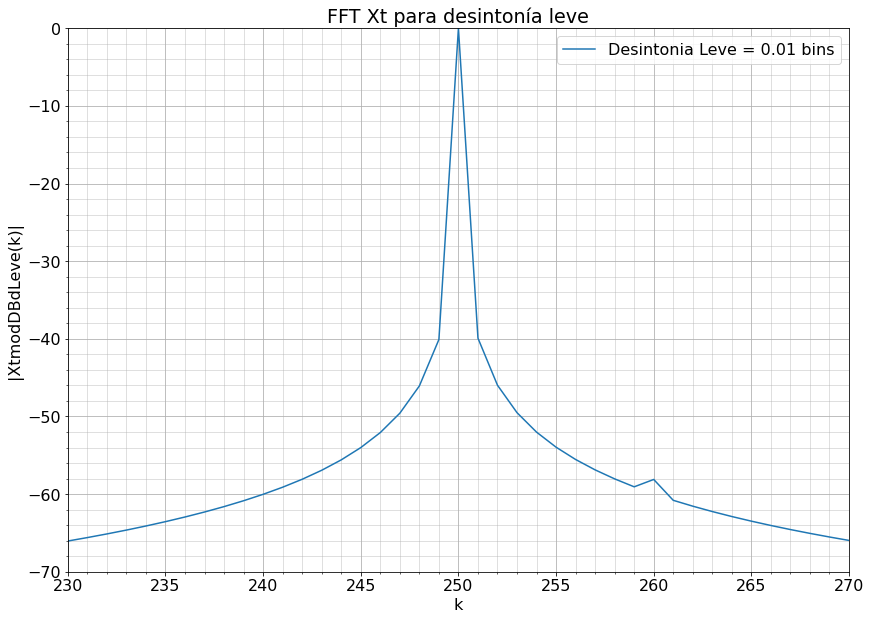

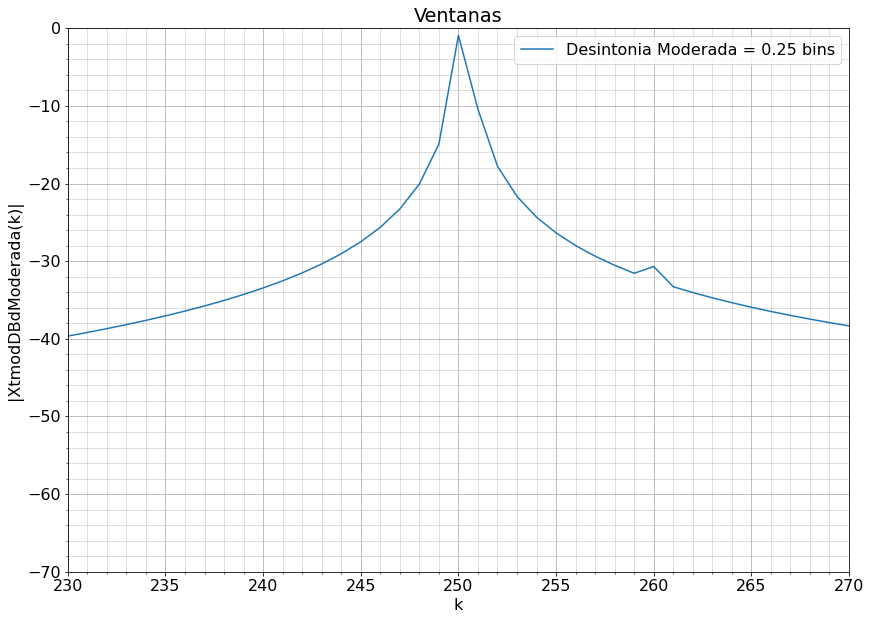

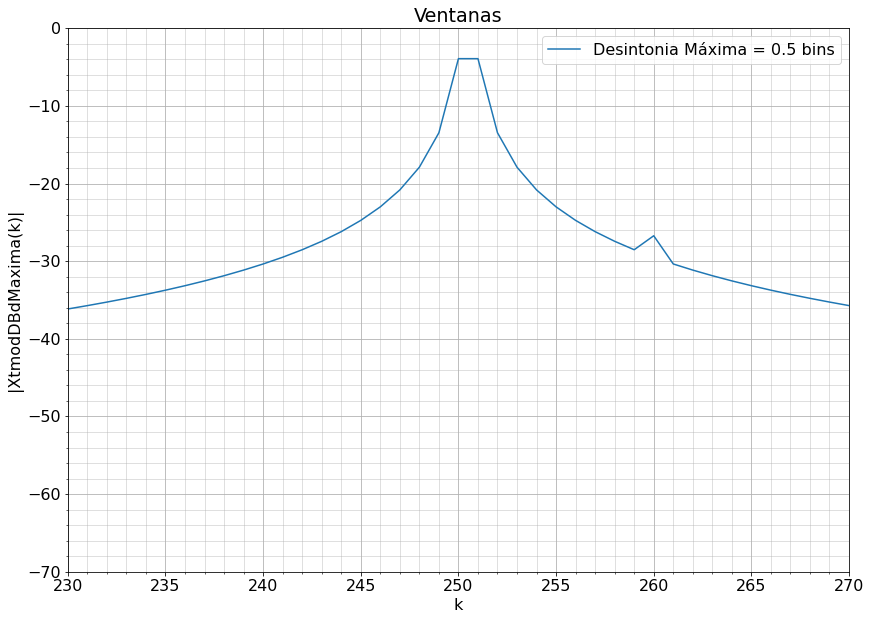

In [38]:

plt.figure(4)
plt.xlim(230,270)
plt.ylim(-70,0)
plt.minorticks_on()
plt.grid(True,'minor',alpha=0.5)
plt.grid(True)
plt.plot(ff[bfrec], XtmodDBdLeve[bfrec],label="Desintonia Leve = 0.01 bins")
plt.xlabel('k')
plt.ylabel('|XtmodDBdLeve(k)|')
plt.title("FFT Xt para desintonía leve")
plt.legend()

plt.figure(5)
plt.xlim(230,270)
plt.ylim(-70,0)
plt.minorticks_on()
plt.grid(True,'minor',alpha=0.5)
plt.grid(True)
plt.plot(ff[bfrec], XtmodDBdModerada[bfrec],label="Desintonia Moderada = 0.25 bins")
plt.xlabel('k')
plt.ylabel('|XtmodDBdModerada(k)|')
plt.title("Ventanas")
plt.legend()

plt.figure(6)
plt.xlim(230,270)
plt.ylim(-70,0)
plt.minorticks_on()
plt.grid(True,'minor',alpha=0.5)
plt.grid(True)
plt.plot(ff[bfrec], XtmodDBdMaxima[bfrec],label="Desintonia Máxima = 0.5 bins")
plt.xlabel('k')
plt.ylabel('|XtmodDBdMaxima(k)|')
plt.title("Ventanas")
plt.legend()

<div class="alert alert-block alert-info">
<b>2.d)</b> Evalúe el efecto de utilizar las ventanas implementadas en 1). Complete la tabla comparativa con respecto a la ventana rectangular, respecto a las mediciones $a^0_2$ realizada en 2.b); y $a^1_2$ en 2.c) para el caso de desintonía máxima.
</div>

Grafique $\lvert X_w(\Omega) \rvert = \lvert \mathcal{F}\{ x(k) · w(k) \} \rvert $ para las 4 ventanas de 1).

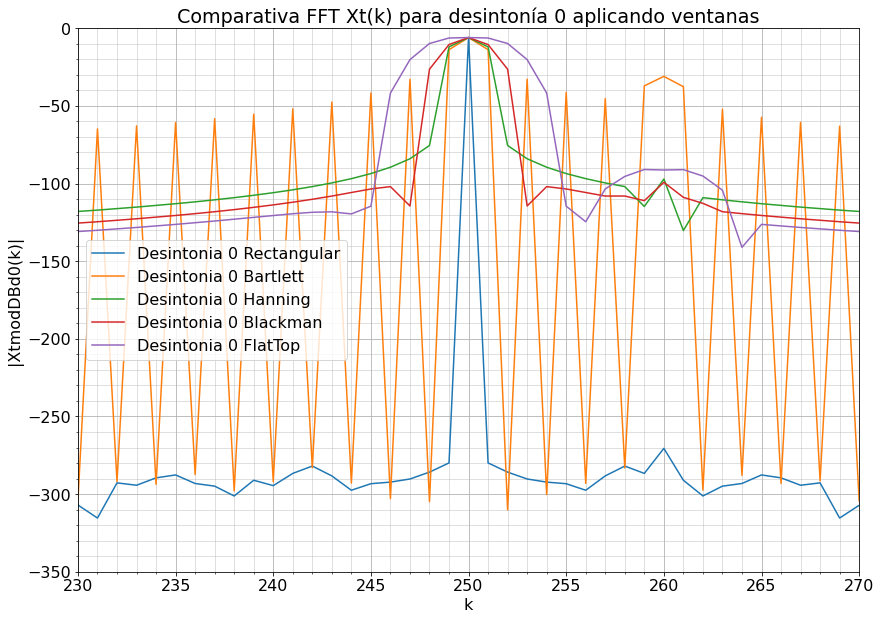

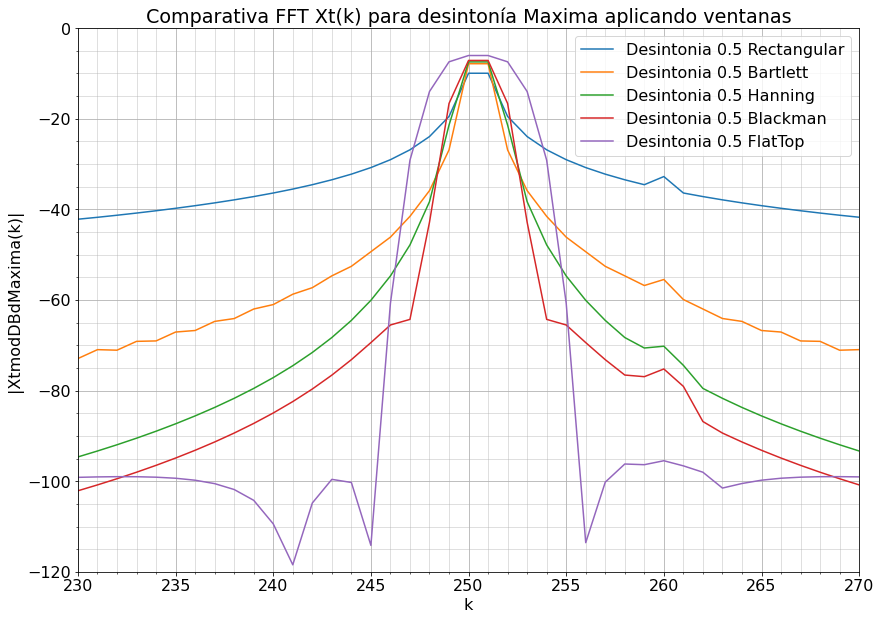

In [48]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################

Attd0Rect = 265
a2d0Rect = 1/np.power(10,Attd0Rect/20)
Attd0Bart = 25
a2d0Bart = 1/np.power(10,Attd0Bart/20)
Attd0Hann = 95
a2d0Hann = 1/np.power(10,Attd0Hann/20)
Attd0Black = 95
a2d0Black = 1/np.power(10,Attd0Black/20)
Attd0Flat = 85
a2d0Flat = 1/np.power(10,Attd0Flat/20)

tt, x1d0 = generador_senoidal(fs, f0, N, a0, p0=0)

tt, x2d0Rect = generador_senoidal(fs, f2, N, a2d0Rect, p0=0)
tt, x2d0Bart = generador_senoidal(fs, f2, N, a2d0Bart, p0=0)
tt, x2d0Hann = generador_senoidal(fs, f2, N, a2d0Hann, p0=0)
tt, x2d0Black = generador_senoidal(fs, f2, N, a2d0Black, p0=0)
tt, x2d0Flat = generador_senoidal(fs, f2, N, a2d0Flat, p0=0)


xtd0Rect = x1d0 + x2d0Rect
xtd0Bart = (x1d0 + x2d0Bart)*wBart
xtd0Hann = (x1d0 + x2d0Hann)*wHann
xtd0Black = (x1d0 + x2d0Black)*wBlack
xtd0Flat = (x1d0 + x2d0Flat)*wFlat

Xtmodd0Rect = np.abs(scipy.fft.fft(xtd0Rect))*2/N
XtmodDBd0Rect = 20*np.log10(Xtmodd0Rect) - fftwRect[0]
Xtmodd0Bart = np.abs(scipy.fft.fft(xtd0Bart))*2/N
XtmodDBd0Bart = 20*np.log10(Xtmodd0Bart) - fftwBart[0]
Xtmodd0Hann = np.abs(scipy.fft.fft(xtd0Hann))*2/N
XtmodDBd0Hann = 20*np.log10(Xtmodd0Hann) - fftwHann[0]
Xtmodd0Black = np.abs(scipy.fft.fft(xtd0Black))*2/N
XtmodDBd0Black = 20*np.log10(Xtmodd0Black) - fftwBlack[0]
Xtmodd0Flat = np.abs(scipy.fft.fft(xtd0Flat))*2/N
XtmodDBd0Flat = 20*np.log10(Xtmodd0Flat) - fftwFlat[0]

plt.figure(1)
plt.xlim(230,270)
plt.ylim(-350,0)
plt.minorticks_on()
plt.grid(True,'minor',alpha=0.5)
plt.grid(True)
plt.plot(ff[bfrec], XtmodDBd0Rect[bfrec],label="Desintonia 0 Rectangular")
plt.plot(ff[bfrec], XtmodDBd0Bart[bfrec],label="Desintonia 0 Bartlett")
plt.plot(ff[bfrec], XtmodDBd0Hann[bfrec],label="Desintonia 0 Hanning")
plt.plot(ff[bfrec], XtmodDBd0Black[bfrec],label="Desintonia 0 Blackman")
plt.plot(ff[bfrec], XtmodDBd0Flat[bfrec],label="Desintonia 0 FlatTop")
plt.xlabel('k')
plt.ylabel('|XtmodDBd0(k)|')
plt.title("Comparativa FFT Xt(k) para desintonía 0 aplicando ventanas")
plt.legend()


AttdMaximaRect = 30
a2dMaximaRect = 1/np.power(10,AttdMaximaRect/20)
AttdMaximaBart = 52
a2dMaximaBart = 1/np.power(10,AttdMaximaBart/20)
AttdMaximaHann = 66
a2dMaximaHann = 1/np.power(10,AttdMaximaHann/20)
AttdMaximaBlack = 70
a2dMaximaBlack = 1/np.power(10,AttdMaximaBlack/20)
AttdMaximaFlat = 90
a2dMaximaFlat = 1/np.power(10,AttdMaximaFlat/20)

tt, x1dMaxima = generador_senoidal(fs, f0 + desintoniaMaxima, N, a0, p0=0)

tt, x2dMaximaRect = generador_senoidal(fs, f2, N, a2dMaximaRect, p0=0)
tt, x2dMaximaBart = generador_senoidal(fs, f2, N, a2dMaximaBart, p0=0)
tt, x2dMaximaHann = generador_senoidal(fs, f2, N, a2dMaximaHann, p0=0)
tt, x2dMaximaBlack = generador_senoidal(fs, f2, N, a2dMaximaBlack, p0=0)
tt, x2dMaximaFlat = generador_senoidal(fs, f2, N, a2dMaximaFlat, p0=0)


xtdMaximaRect = x1dMaxima + x2dMaximaRect
xtdMaximaBart = (x1dMaxima + x2dMaximaBart)*wBart
xtdMaximaHann = (x1dMaxima + x2dMaximaHann)*wHann
xtdMaximaBlack = (x1dMaxima + x2dMaximaBlack)*wBlack
xtdMaximaFlat = (x1dMaxima + x2dMaximaFlat)*wFlat

XtmoddMaximaRect = np.abs(scipy.fft.fft(xtdMaximaRect))*2/N
XtmodDBdMaximaRect = 20*np.log10(XtmoddMaximaRect) - fftwRect[0]
XtmoddMaximaBart = np.abs(scipy.fft.fft(xtdMaximaBart))*2/N
XtmodDBdMaximaBart = 20*np.log10(XtmoddMaximaBart) - fftwBart[0]
XtmoddMaximaHann = np.abs(scipy.fft.fft(xtdMaximaHann))*2/N
XtmodDBdMaximaHann = 20*np.log10(XtmoddMaximaHann) - fftwHann[0]
XtmoddMaximaBlack = np.abs(scipy.fft.fft(xtdMaximaBlack))*2/N
XtmodDBdMaximaBlack = 20*np.log10(XtmoddMaximaBlack) - fftwBlack[0]
XtmoddMaximaFlat = np.abs(scipy.fft.fft(xtdMaximaFlat))*2/N
XtmodDBdMaximaFlat = 20*np.log10(XtmoddMaximaFlat) - fftwFlat[0]

plt.figure(2)
plt.xlim(230,270)
plt.ylim(-120,0)
plt.minorticks_on()
plt.grid(True,'minor',alpha=0.5)
plt.grid(True)
plt.plot(ff[bfrec], XtmodDBdMaximaRect[bfrec],label="Desintonia 0.5 Rectangular")
plt.plot(ff[bfrec], XtmodDBdMaximaBart[bfrec],label="Desintonia 0.5 Bartlett")
plt.plot(ff[bfrec], XtmodDBdMaximaHann[bfrec],label="Desintonia 0.5 Hanning")
plt.plot(ff[bfrec], XtmodDBdMaximaBlack[bfrec],label="Desintonia 0.5 Blackman")
plt.plot(ff[bfrec], XtmodDBdMaximaFlat[bfrec],label="Desintonia 0.5 FlatTop")
plt.xlabel('k')
plt.ylabel('|XtmodDBdMaxima(k)|')
plt.title("Comparativa FFT Xt(k) para desintonía Maxima aplicando ventanas")
plt.legend()

In [50]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   [Attd0Rect, AttdMaximaRect], # <-- acá debería haber numeritos :)
                   [Attd0Bart, AttdMaximaBart], # <-- acá debería haber numeritos :)
                   [Attd0Hann, AttdMaximaHann], # <-- acá debería haber numeritos :)
                   [Attd0Flat, AttdMaximaBlack], # <-- acá debería haber numeritos :)
                   [Attd0Hann, AttdMaximaFlat] # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$a^0_2$ (dB)','$a^1_2$ (dB)'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$a^0_2$ (dB),$a^1_2$ (dB)
Rectangular,265,30
Bartlett,25,52
Hann,95,66
Blackman,85,70
Flat-top,95,90


<div class="alert alert-block alert-info">
<b>2.e)</b> Para las ventanas analizadas en 1), decida cuál sería la más apropiada en el caso que, <b>sin afectar otro parámetro</b>, $\Omega_2$ pudiera acercarse libremente a $\Omega_1 = \frac{\pi}{2} + 0.5·\frac{2\pi}{N}$. Complete la siguiente tabla con la distancia mínima, $\Omega_0, $ a la que se puede distinguir $x_2$ en $\lvert X_w(\Omega) \rvert$.
</div>

In [11]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   '', # <-- acá debería haber numeritos :)
                   '', # <-- acá debería haber numeritos :)
                   '', # <-- acá debería haber numeritos :)
                   '', # <-- acá debería haber numeritos :)
                   '' # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$\Omega_0$ (#)'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$\Omega_0$ (#)
Rectangular,
Bartlett,
Hann,
Blackman,
Flat-top,


<div class="alert alert-block alert-info">
<b>3)</b> Genere la siguiente señal 

</div>

  $  x(k) = a_0·\mathop{sen}(\Omega_1·k)$


siendo 

  $a_0 = 2$

  $\Omega_1 = \Omega_0 + f_r·\frac{2\pi}{N} $

  $\Omega_0 = \frac{\pi}{2} $
  
y la variable aleatoria definida por

  $f_r \sim \mathcal{U}(-2, \, 2) $

Considere 200 realizaciones para cada experimento requerido en los siguiente incisos.


<div class="alert alert-block alert-info">
<b>3.a)</b> Calcule experimentalmente el sesgo y la varianza del siguiente estimador:
</div>

 
  $ \hat{a_0} = \lvert X^i_w(\Omega_0) \rvert$
  
siendo

  $\lvert X^i_w(\Omega) \rvert = \lvert \mathcal{F}\{ x(k) · w_i(k) \} \rvert $ 
  
para la *i*-ésima ventana de las 5 utilizadas en el punto 2).

El sesgo y la varianza se definen para este caso como

  $ s_a = \mathop{E}\{ \hat{a_0}\} - a_0  $
    
  $ v_a = \mathop{var} \{ \hat{a_0} \} = \mathop{E}\{ ( \hat{a_0} - \mathop{E} \{ \hat{a_0} \} )^2 \} $
  
y pueden aproximarse cuando consideramos los valores esperados como las medias muestrales ($a=a_0$ para simplificar la notación)

  $ \mathop{E}\{ \hat{a_0}\}  = \hat{\mu_a} =  \frac{1}{M} \sum^{M-1}_{j=0} \hat{a_{j}} $
  
  $ s_a = \hat{\mu_a} - a  $
    
  $ v_a = \frac{1}{M} \sum^{M-1}_{j=0} (\hat{a_{j}} - \hat{\mu_a})^2 $



Grafique los histogramas para  $\lvert X^i_w(\Omega_0) \rvert$. 

<div class="alert alert-block alert-danger">
<img src="./ojo.svg" align="left" width="50" />   Cuide que todos los gráficos tengan <b>el mismo rango de valores en X</b> para facilitar la comparación.
</div>

In [12]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################



In [13]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$s_a$', '$v_a$'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$s_a$,$v_a$
Rectangular,,
Bartlett,,
Hann,,
Blackman,,
Flat-top,,


<div class="alert alert-block alert-info">
<b>3.b)</b> Repita a) para el siguiente estimador:
</div>

 
  $ \hat{a_1} = \sqrt{\frac{1}{5}·\sum_{j=a}^{b} \lvert X^i_w(j) \rvert ^2} $
  
siendo $ a = \Omega_0 - 2·\frac{2\pi}{N} $ y $ b = \Omega_0 + 2·\frac{2\pi}{N} $

para la *i*-ésima ventana de las 5 utilizadas en el punto 2).

Grafique los histogramas para  $\lvert X^i_w(\Omega_0) \rvert$. 

<div class="alert alert-block alert-danger">
<img src="./ojo.svg" align="left" width="50" />   Cuide que todos los gráficos tengan <b>el mismo rango de valores en X</b> para facilitar la comparación.
</div>

In [14]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################



In [15]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$s_a$', '$v_a$'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$s_a$,$v_a$
Rectangular,,
Bartlett,,
Hann,,
Blackman,,
Flat-top,,
